# Principal Component Analysis

Ένας από τους ευρύτερα χρησιμοποιούμενους αλγόριθμους μη επιβλεπόμενης μάθησης, είναι η Ανάλυση Κύριων Συνιστωσών (PCA -Principal Component Analysis). 
Το PCA είναι ένας αλγόριθμος  μείωσης διαστάσεων, μια γρήγορη και ευέλικτη μέθοδος χωρίς επίβλεψη για μείωση της διαστατικότητας στα δεδομένα,  αλλά μπορεί επίσης να είναι χρήσιμος ως εργαλείο οπτικοποίησης, φιλτραρίσματος θορύβου, εξαγωγής χαρακτηριστικών και πολλά άλλα. 

Σίγουρα το PCA δεν είναι χρήσιμο για κάθε σύνολο δεδομένων υψηλών διαστάσεων, αλλά προσφέρει μια απλή και αποτελεσματική διαδρομή για την απόκτηση πληροφοριών σχετικά με τα δεδομένα υψηλής διάστασης. 

Η κύρια αδυναμία του PCA είναι ότι τείνει να επηρεάζεται ιδιαίτερα από τα ακραία σημεία στα δεδομένα. 

Για αυτόν τον λόγο, έχουν αναπτυχθεί πολλές ισχυρές παραλλαγές του PCA, πολλές από τις οποίες ενεργούν για να απορρίψουν επαναληπτικά σημεία δεδομένων που δεν περιγράφονται καλά από τα αρχικά στοιχεία. 

Το Scikit-Learn περιέχει μερικές ενδιαφέρουσες παραλλαγές στο PCA, συμπεριλαμβανομένων των "RandomizedPCA" και "SparsePCA", και οι δύο στο υποσύστημα "sklearn.decomposition". 
Το "RandomizedPCA" χρησιμοποιεί μια μη ντετερμινιστική μέθοδο για να προσεγγίσει γρήγορα τα πρώτα βασικά συστατικά σε δεδομένα πολύ υψηλής διαστάσης, ενώ το "SparsePCA" εισάγει έναν όρο κανονικοποίησης που χρησιμεύει για την ενίσχυση του sparsity των συστατικών.


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Ένα απλό παράδειγμα 

Έστω ότι έχουμε ένα τυχαίο σύνολο με 200 σημεία:

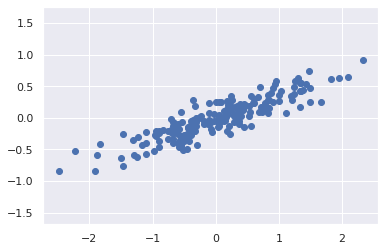

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Με μια πρώτη ματιά  φαίνεται ότι υπάρχει σχεδόν γραμμική σχέση μεταξύ των μεταβλητών x και y. Εδώ, αντί να προσπαθούμε να προβλέψουμε τις τιμές y από τις τιμές x, το μη επιτηρούμενης μάθησης πρόβλημα προσπαθεί να μάθει για τη σχέση μεταξύ τις τιμές x και y. 

Στο PCA αυτή η σχέση ποσοτικοποιείται με την εύρεση μιας λίστας των κύριων αξόνων στα δεδομένα και χρησιμοποιώντας αυτούς τους άξονες περιγράφει το σύνολο δεδομένων. 

Χρησιμοποιώντας τον εκτιμητή PCA του Scikit-Learn, μπορούμε να το υπολογίσουμε ως εξής:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Κατά την εφαρμογή μαθαίνει κάποιες ποσότητες από τα δεδομένα, το πιο σημαντικό είναι τα "components" και η "explained variance"

In [ ]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Για να δούμε τι σημαίνουν αυτοί οι αριθμοί, ας τους απεικονίσουμε ως διανύσματα πάνω από τα δεδομένα εισόδου, χρησιμοποιώντας τα "components" για να καθορίσουμε την κατεύθυνση του διανύσματος και την "explained variance" για να καθορίσουμε το τετράγωνο του μήκους του διανύσματος.

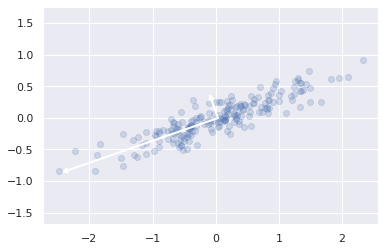

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Αυτά τα διανύσματα αντιπροσωπεύουν τους *κύριους άξονες* των δεδομένων και το μήκος του διανύσματος είναι μια ένδειξη του πόσο «σημαντικός» είναι αυτός ο άξονας στην περιγραφή της κατανομής των δεδομένων.
Η προβολή κάθε σημείου δεδομένων στους κύριους άξονες είναι οι «κύριες συνιστώσες» των δεδομένων.
 Εάν σχεδιάσουμε αυτές τις κύριες συνιστώσες εκτός από τα αρχικά δεδομένα, βλέπουμε τις γραφικές παραστάσεις που εμφανίζονται εδώ:

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

[(-3.0, 3.1),
 Text(0, 0.5, 'component 2'),
 (-5.0, 5.0),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

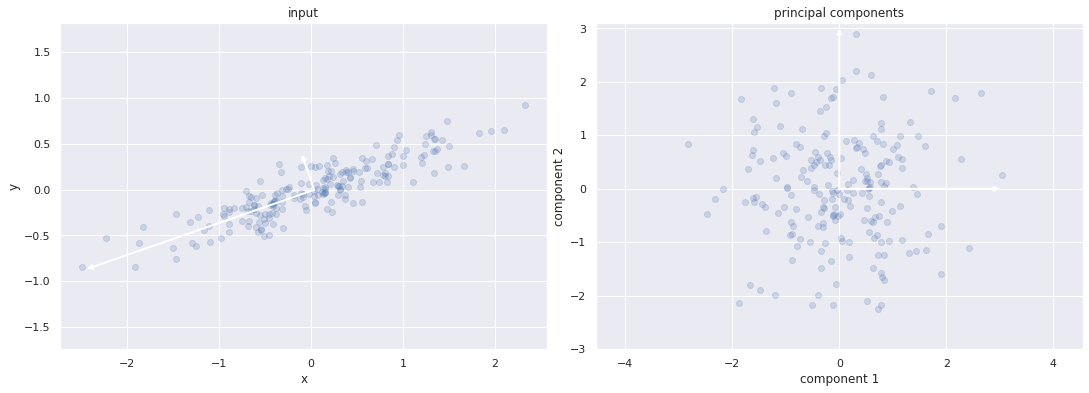

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))



Αυτός ο μετασχηματισμός από τους άξονες των δεδομένων στους κύριους άξονες είναι ένας *αφινικός μετασχηματισμού *, που ουσιαστικά σημαίνει ότι αποτελείται από μια μετακίνηση, περιστροφή και ομοιόμορφη κλιμάκωση. 



### Χρήση PCA για μείωση διαστάσεων

Η χρήση PCA για μείωση διαστάσεων συνεπάγεται μηδενισμό ενός ή περισσοτέρων από τις μικρότερες κύριες συνιστώσες, με αποτέλεσμα την προβολή σε λιγότερες διαστάσεων των δεδομένων η οποία διατηρεί τη μέγιστη διακύμανση δεδομένων. 
 

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Τα μετασχηματισμένα δεδομένα έχουν μειωθεί σε μία μόνο διάσταση. Για να κατανοήσουμε το αποτέλεσμα αυτής της μείωσης διαστάσεων, μπορούμε να πραγματοποιήσουμε τον αντίστροφο μετασχηματισμό αυτών των μειωμένων δεδομένων και να το σχεδιάσουμε μαζί με τα αρχικά δεδομένα:

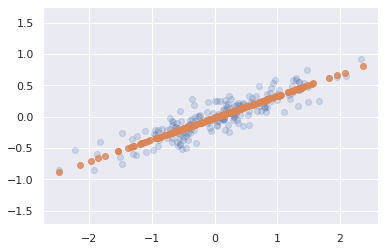

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Τα αρχικά δεδομένα είναι τα μπλε ενώ τα μειωμένα είναι τα πορτοκαλί

Βλέπουμε ότι με τo PCA oι πληροφορίες κατά μήκος του λιγότερο σημαντικού κύριου άξονα αφαιρούνται, αφήνοντας μόνο τις κύριες συνιστώσες των δεδομένων με την υψηλότερη διακύμανση.

Το κλάσμα διακύμανσης που αποκόπτεται (ανάλογο με την εξάπλωση σημείων σχετικά με τη γραμμή που σχηματίζεται σε αυτό το σχήμα) είναι περίπου ένα μέτρο του πόσο απορρίπτονται οι "πληροφορίες" σε αυτή τη μείωση της διαστατικότητας.

Αυτό το σύνολο δεδομένων μειωμένης διάστασης είναι κατά κάποιο τρόπο «αρκετά καλό» για να κωδικοποιήσει τις πιο σημαντικές σχέσεις μεταξύ των σημείων: παρά τη μείωση της διάστασης των δεδομένων κατά 50%, η συνολική σχέση μεταξύ των σημείων δεδομένων διατηρείται ως επί το πλείστον.


## PCA για οπτικοποίηση: Χειρόγραφα ψηφία

Η χρησιμότητα της μείωσης διαστάσεων δεν μπορεί να είναι απολύτως εμφανής μόνο σε δύο διαστάσεις, αλλά γίνεται πολύ πιο ξεκάθαρη όταν εξετάζουμε δεδομένα υψηλών διαστάσεων. 

Θα δούμε λοιπόν μία εφαρμογή του PCA σε ένα σύνολο από χειρόγραφα ψηφία. 

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Τα δεδομένα μας είναι 8 × 8 pixel, που σημαίνει ότι είναι 64-διαστάσεων. Για να αποκτήσουμε κάποια διαίσθηση στις σχέσεις μεταξύ αυτών των σημείων, μπορούμε να χρησιμοποιήσουμε το PCA για να τα προβάλουμε σε έναν πιο διαχειρίσιμο αριθμό διαστάσεων, π.χ. 2:

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Μπορούμε τώρα να σχεδιάσουμε τις πρώτες δύο κύριες συνιστώσες (principal components) κάθε σημείου για να μάθουμε για τα δεδομένα:

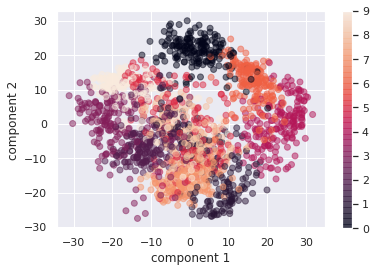

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Τα πλήρη δεδομένα είναι σημεία 64-διαστάσεων και αυτά τα σημεία που βλέπουμε τώρα είναι η προβολή του κάθε σημείου δεδομένων κατά τις κατευθύνσεις με τη μεγαλύτερη διακύμανση. 

Ουσιαστικά, βρήκαμε τη βέλτιστη έκταση και περιστροφή σε 64-διαστατικό χώρο που μας επιτρέπει να βλέπουμε τη διάταξη των ψηφίων σε δύο διαστάσεις και το έχουμε κάνει με έναν μη επιβλεπόμενο τρόπο - δηλαδή, χωρίς αναφορά στις ετικέτες.

**Τι σημαίνουν οι συνιστώσες;  Τι σημαίνουν οι μειωμένες διαστάσεις;**

Αυτό μπορεί να γίνει κατανοητό μέσω των συνδυασμών διανυσμάτων βάσης.

Για παράδειγμα, κάθε εικόνα στο σύνολο εκπαίδευσης καθορίζεται από μια συλλογή τιμών 64 pixel, τις οποίες θα ονομάσουμε διάνυσμα $x$: 

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

Ένας τρόπος για να το σκεφτούμε αυτό είναι από την άποψη των pixel. Δηλαδή, για την κατασκευή της εικόνας, πολλαπλασιάζουμε κάθε συνιστώσα του διανύσματος με το pixel που περιγράφει και στη συνέχεια, προσθέτουμε τα αποτελέσματα μαζί για να δημιουργήσουμε την εικόνα:

$${\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}$$

Ένας τρόπος που θα μπορούσαμε να φανταστούμε τη μείωση της διάστασης αυτών των δεδομένων είναι να μηδενιστoύν όλα εκτός από μερικά από αυτά τα διανύσματα βάσης. 

Για παράδειγμα, εάν χρησιμοποιούμε μόνο τα πρώτα οκτώ pixel, έχουμε μια οκταδιάστατη προβολή των δεδομένων,αλλά δεν αντανακλά σε ολόκληρη την εικόνα: έχουμε πετάξει σχεδόν το 90% των pixel!

In [ ]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

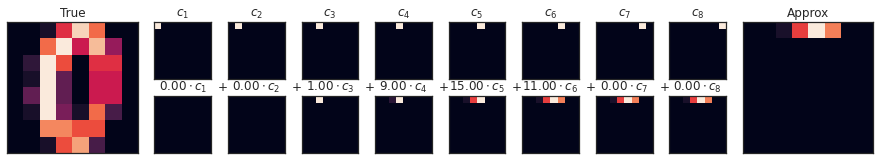

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
sns.set_style('white')

fig = plot_pca_components(digits.data[10],
                          show_mean=False)


Η πάνω σειρά εικόνων δείχνει τα μεμονωμένα εικονοστοιχεία και η κάτω σειρά δείχνει τη συσσωρευτική συνεισφορά αυτών των εικονοστοιχείων στην κατασκευή της εικόνας. 

Χρησιμοποιώντας μόνο οκτώ στοιχεία βασισμένα σε pixel, μπορούμε να κατασκευάσουμε μόνο ένα μικρό τμήμα της εικόνας 64 pixel. Αν συνεχίσουμε αυτήν την ακολουθία και χρησιμοποιήσουμε και τα 64 pixel, θα ανακτήσουμε την αρχική εικόνα.

Αλλά η αναπαράσταση με pixel δεν είναι η μόνη επιλογή βάσης. 
Μπορούμε επίσης να χρησιμοποιήσουμε άλλες βασικές συναρτήσεις, οι οποίες καθεμιά περιέχουν κάποια προκαθορισμένη συνεισφορά από κάθε pixel, και να γράψουμε κάτι παρόμοιο με το:

 $$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$
 
Το PCA μπορεί να θεωρηθεί ως μια διαδικασία επιλογής βέλτιστων συναρτήσεων βάσης, έτσι ώστε η προσθήκη μόνο των πρώτων από αυτές είναι αρκετή για την κατάλληλη ανακατασκευή του όγκου του σύνολου των δεδομένων. 
 
Οι κύριες συνιστώσες, οι οποίες λειτουργούν ως η χαμηλή διάστασης αναπαράσταση των δεδομένων μας, είναι απλά οι συντελεστές που πολλαπλασιάζουν κάθε ένα από τα στοιχεία αυτής της σειράς. 

Αυτό το σχήμα δείχνει μια παρόμοια απεικόνιση της ανακατασκευής αυτού του ψηφίου χρησιμοποιώντας τη μέση τιμή συν τις πρώτες οκτώ συναρτήσεις βάσης του PCA:

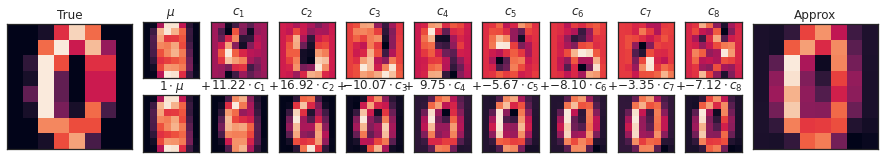

In [ ]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)



Σε αντίθεση με τη βάση με pixel, η βάση PCA μας επιτρέπει να ανακτήσουμε τα εμφανή χαρακτηριστικά της εικόνας εισόδου με ένα μέσο συν οκτώ συνιστώσες. 

Η ποσότητα κάθε εικονοστοιχείου σε κάθε συνιστώσα είναι το αποτέλεσμα του προσανατολισμού του διανύσματος στο δισδιάστατο μας παράδειγμα.

Αυτή είναι η έννοια με την οποία το PCA παρέχει μια χαμηλής διάστασης αναπαράσταση των δεδομένων: ανακαλύπτει ένα σύνολο συναρτήσεων βάσης που είναι πιο αποτελεσματικές από τη φυσική βάση των pixel των δεδομένων εισόδου.

####Επιλογή του αριθμού των συνιστωσών

Ένα ουσιαστικό μέρος της χρήσης του PCA στην πράξη είναι η ικανότητα εκτίμησης πόσων συνιστωσών απαιτούνται για την περιγραφή των δεδομένων. Αυτό μπορεί να καθοριστεί εξετάζοντας την αθροιστική *explained variance ratio* ως συνάρτηση του αριθμού των συνιστωσών:

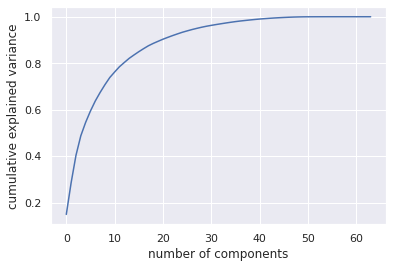

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Αυτή η καμπύλη ποσοτικοποιεί πόση από τη συνολική, 64-διαστατική διακύμανση περιέχεται στις πρώτες $Ν$ συνιστώσες. Για παράδειγμα, βλέπουμε ότι με τα ψηφία οι πρώτες 10 συνιστώσες περιέχουν περίπου το 75% της διακύμανσης, ενώ χρειάζετε περίπου 50 συνιστώσες για να περιγραφεί σχεδόν το 100% της διακύμανσης. 

Εδώ βλέπουμε ότι η δισδιάστατη προβολή μας, χάνει πολλές πληροφορίες (όπως μετράται από την explained variance) και ότι χρειαζόμαστε περίπου 20 συνιστώσες για να διατηρήσουμε το 90% της διακύμανσης. 

Κοιτάζοντας αυτό το διάγραμμα για ένα σύνολο δεδομένων υψηλής διάστασης μπορούμε να κατανοήσουμε το επίπεδο πλεονασμού που υπάρχει σε πολλές παρατηρήσεις.

## Φιλτράρισμα θορύβου με PCA
Το PCA μπορεί επίσης να χρησιμοποιηθεί ως φιλτραρίσμα για θορυβώδη δεδομένα.

Οποιεσδήποτε συνιστώσες με διακύμανση πολύ μεγαλύτερες από την επίδραση του θορύβου θα πρέπει να μην επηρεάζονται σχετικά από τον θόρυβο.

Έτσι, εάν ανακατασκευάσετε τα δεδομένα χρησιμοποιώντας μόνο το μεγαλύτερο υποσύνολο των κύριων συνιστωσών, θα πρέπει να διατηρείτε το σήμα και να εξαλείφεται ο θόρυβος.

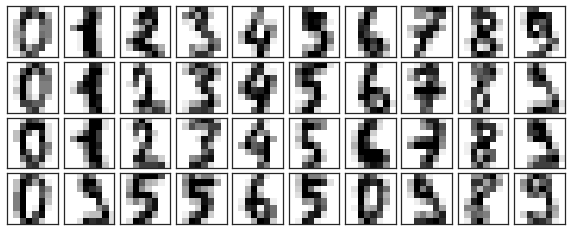

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Πρώτα θα σχεδιάσουμε πολλά από τα δεδομένα χωρίς θόρυβο εισόδου και έπειτα θα προσθέσουμε τυχαίο θόρυβο για να δημιουργήσουμε θορυβώδη σύνολο δεδομένων.

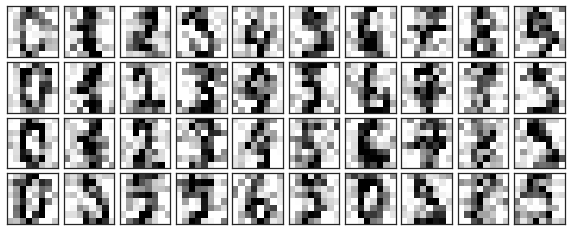

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Είναι ξεκάθαρο ότι οι εικόνες είναι θορυβώδεις και περιέχουν πλαστά pixel. Ας εκπαιδεύσουμε ένα PCA για τα θορυβώδη δεδομένα, ζητώντας από την προβολή να διατηρήσει το 50% της διακύμανσης:

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Εδώ το 50% της διακύμανσης ανέρχεται σε 12 βασικά συστατικά. Τώρα υπολογίζουμε αυτά τα συστατικά και στη συνέχεια χρησιμοποιούμε το αντίστροφο του μετασχηματισμού για να ανακατασκευάσουμε τις εικόνες με τα φιλτραρισμένα ψηφία:

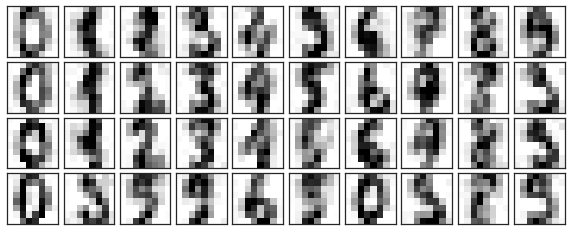

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Αυτή η ιδιότητα διατήρησης σήματος/φιλτραρίσματος θορύβου καθιστά το PCA μια πολύ χρήσιμη συνάρτηση επιλογής χαρακτηριστικών.

Για παράδειγμα, αντί να εκπαιδεύετε έναν ταξινομητή σε δεδομένα πολύ υψηλής διάστασης, μπορείτε να τον εκπαιδεύσετε στην αναπαράσταση χαμηλότερης διάστασης, η οποία αυτόματα θα φιλτράρει και τον τυχαίο θόρυβο στις εισόδους.

## EigenFaces

To Labeled Faces in the Wild (LFW) είναι μια βάση δεδομένων με φωτογραφίες προσώπου που έχουν σχεδιαστεί για τη μελέτη του προβλήματος της αναγνώρισης προσώπου. Είναι ένα προσημειωμένο σύνολο δεδομένων που περιέχει περισσότερες από 13.000 εικόνες προσώπων. 1680 από τα άτομα που απεικονίζονται έχουν δύο ή περισσότερες ξεχωριστές φωτογραφίες στο σύνολο δεδομένων. 

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Επειδή πρόκειται για ένα μεγάλο σύνολο δεδομένων, θα χρησιμοποιήσουμε το RandomizedPCA - περιέχει μια τυχαιοποιημένη μέθοδο για την προσέγγιση των πρώτων βασικών συστατικών $N$ πολύ πιο γρήγορα από τον τυπικό εκτιμητή PCA, και ως εκ τούτου είναι πολύ χρήσιμο για δεδομένα υψηλής διάστασης (εδώ, μια διάσταση σχεδόν 3.000). Θα ρίξουμε μια ματιά στα πρώτα 150 συστατικά:

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA

pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Είναι ενδιαφέρον να οπτικοποιήσουμε τις εικόνες που σχετίζονται με τα πρώτες κύριες συνιστώσες(τα ιδιοδιανύσματα και έτσι αυτοί οι τύποι εικόνων ονομάζονται συχνά "eigenfaces").

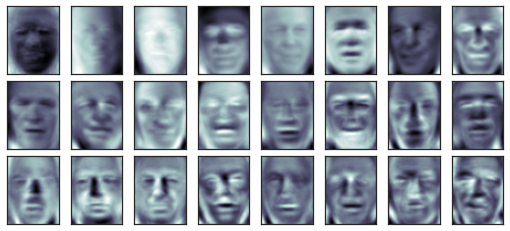

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Τα αποτελέσματα είναι πολύ ενδιαφέροντα και μας δίνουν πληροφορίες για το πώς ποικίλλουν οι εικόνες: για παράδειγμα, τα πρώτα λίγα πρόσωπα (πάνω αριστερά) φαίνεται να σχετίζονται με τη γωνία φωτισμού στο πρόσωπο και οι επόμενες κύριες συνιστώσες σχετίζονται με ορισμένα χαρακτηριστικά, όπως τα μάτια, οι μύτες και τα χείλη. Ας ρίξουμε μια ματιά στη συσσωρευτική διακύμανση αυτών των συνιστωσών για να δούμε πόσες από τις πληροφορίες δεδομένων διατηρεί η προβολή:

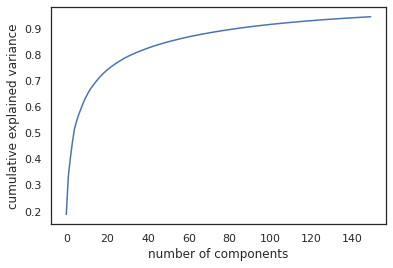

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Βλέπουμε ότι αυτά τα 150 στοιχεία αντιπροσωπεύουν λίγο περισσότερο από το 90% της διακύμανσης. Αυτό θα μας έκανε να πιστεύουμε ότι χρησιμοποιώντας αυτά τα 150 στοιχεία, θα ανακτήσουμε τα περισσότερα από τα βασικά χαρακτηριστικά των δεδομένων. Για να το κάνουμε πιο συγκεκριμένο, μπορούμε να συγκρίνουμε τις εικόνες εισόδου με τις εικόνες που ανακατασκευάστηκαν από αυτά τα 150 στοιχεία:

In [ ]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

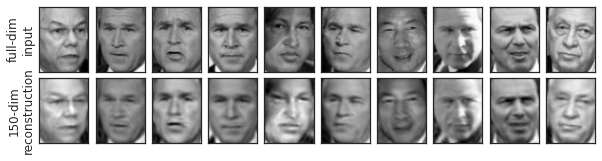

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

Η επάνω σειρά δείχνει τις εικόνες εισόδου, ενώ η κάτω σειρά δείχνει την ανακατασκευή των εικόνων από μόλις 150 από τα ~ 3.000 αρχικά χαρακτηριστικά. 

Αυτή η οπτικοποίηση καθιστά σαφές γιατί η επιλογή χαρακτηριστικών με PCA είναι τόσο επιτυχημένη: αν και μειώνει τη διάσταση των δεδομένων κατά σχεδόν έναν παράγοντα 20, οι προβαλλόμενες εικόνες περιέχουν αρκετές πληροφορίες ώστε να μπορούμε να αναγνωρίσουμε τα άτομα που εμφανίζονται σε αυτές. 

Αυτό σημαίνει ότι ο αλγόριθμος ταξινόμησης πρέπει να εκπαιδεύεται σε δεδομένα 150 διαστάσεων και όχι σε δεδομένα 3.000 διαστάσεων, τα οποία ανάλογα με τον συγκεκριμένο αλγόριθμο που επιλέγουμε, μπορούν να οδηγήσουν σε πολύ πιο αποτελεσματική ταξινόμηση.